In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 400)

In [3]:
datapath_base = 'data/negotiate/'
datapath_pp = 'data/negotiate_prepend/'
datapath_rp = 'data/negotiate_replace/'

In [4]:
def load_dfs(datapath):
    dfs = []
    for file in os.listdir(datapath):
        if "csv" in file:
            df = pd.read_csv(os.path.join(datapath, file), index_col = 0)
            #collapse no deal tokens
            df.loc[df['target'].str.contains('<disagree>'), 'target'] = "Disagree"
            df.loc[df['target'].str.contains('<no agreement>'), 'target'] = "Disagree"
            df.loc[df['target'].str.contains('<disconnect>'), 'target'] = "Disagree"
            df.loc[df['output'].str.contains('<disagree>'), 'output'] = "Disagree"
            df.loc[df['output'].str.contains('<no agreement>'), 'output'] = "Disagree"
            df.loc[df['output'].str.contains('<disconnect>'), 'output'] = "Disagree"
            dfs.append(df)
    return dfs

In [5]:
base_dfs = load_dfs(datapath_base)
pp_dfs = load_dfs(datapath_pp)
rp_dfs = load_dfs(datapath_rp)

In [6]:
def get_acc(df_list):
    accs = []
    for df in df_list:
        accs.append((df['target'] == df['output']).mean() * 100)
    return accs

In [7]:
acc_df = pd.DataFrame({'Base':get_acc(base_dfs), 'Prepended':get_acc(pp_dfs), 'Replaced':get_acc(rp_dfs)})
acc_df

,Base,Prepended,Replaced
0,69.866920,68.726236,65.019011
1,71.958175,70.057034,65.494297
2,69.771863,68.441065,64.068441
3,70.722433,69.486692,66.539924
4,71.958175,68.536122,65.114068


Text(0.5, 1.0, 'OOF Selection Model Accuracy')

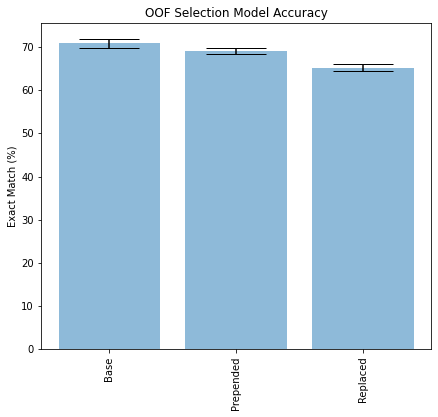

In [8]:
labs = acc_df.columns
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
ax = axs
ax.bar(np.arange(len(labs)), acc_df.mean(), yerr=acc_df.std(), align='center', alpha=0.5, ecolor='black', capsize=30)
ax.set_ylabel('Exact Match (%)')
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs, rotation=90)
ax.set_title('OOF Selection Model Accuracy')

## Sample of Errors

In [9]:
def get_error_sample(df):
    return df[df['output'] != df['target']].head()

## Base

In [10]:
get_error_sample(base_dfs[0])

,context,input,target,output
1,"[['4'], ['1'], ['1'], ['1'], ['1'], ['5']]","THEM: i would like the hat and the ball and one book . <eos> YOU: i can offer you the hat and one book <eos> THEM: how about i take the hat and the ball and you take all the books ? <eos> YOU: i need the ball and three books <eos> THEM: ok , i agree . <eos> YOU: <selection>","['item0=3', 'item1=0', 'item2=1', 'item0=1', 'item1=1', 'item2=0']","['item0=2', 'item1=0', 'item2=1', 'item0=0', 'item1=1', 'item2=0']"
2,"[['3'], ['0'], ['1'], ['4'], ['2'], ['3']]",YOU: i'll take the balls and hat if you want the books <eos> THEM: deal . <eos> YOU: <selection>,Disagree,"['item0=0', 'item1=1', 'item2=2', 'item0=3', 'item1=0', 'item2=0']"
12,"[['4'], ['0'], ['2'], ['5'], ['1'], ['0']]","YOU: can i have the hats and a book please ? <eos> THEM: you can have the hats , i would need everything else <eos> YOU: i have the hats , but i will need either a book or a ball . or no deal . <eos> THEM: take the hats and a book <eos> YOU: deal . <eos> THEM: <selection>","['item0=1', 'item1=2', 'item2=0', 'item0=3', 'item1=0', 'item2=1']","['item0=1', 'item1=2', 'item2=0', 'item0=1', 'item1=0', 'item2=1']"
21,"[['1'], ['1'], ['1'], ['5'], ['4'], ['1']]","YOU: you can have the book if i get the hat . <eos> THEM: its a deal . you can have the balls also . <eos> YOU: cool , deal . <eos> THEM: <selection>",Disagree,"['item0=0', 'item1=1', 'item2=4', 'item0=1', 'item1=1', 'item2=0']"
25,"[['4'], ['1'], ['2'], ['2'], ['1'], ['2']]",THEM: i'll take the ball and 2 of the books . <eos> YOU: deal <eos> THEM: you sure ? <eos> YOU: pretty sure <eos> THEM: <selection>,Disagree,"['item0=2', 'item1=2', 'item2=0', 'item0=2', 'item1=0', 'item2=1']"


## Prepended

In [11]:
get_error_sample(pp_dfs[0])

,context,input,target,output
1,"[['4'], ['1'], ['1'], ['1'], ['1'], ['5']]","THEM: _need( _books 1 _hats 1 _balls 1 ) - i would like the hat and the ball and one book . <eos> YOU: _offer( _books 1 _hats 1 ) - i can offer you the hat and one book <eos> THEM: _need( _hats 1 _balls 1 ) _offer( _books all ) - how about i take the hat and the ball and you take all the books ? <eos> YOU: _need( _books 3 _balls 1 ) - i need the ball and three books <eos> THEM: _deal - ok , i ...","['item0=3', 'item1=0', 'item2=1', 'item0=1', 'item1=1', 'item2=0']","['item0=3', 'item1=0', 'item2=1', 'item0=0', 'item1=1', 'item2=0']"
2,"[['3'], ['0'], ['1'], ['4'], ['2'], ['3']]",YOU: _need( _hats 1 _balls all ) _offer( _books all ) - i'll take the balls and hat if you want the books <eos> THEM: _deal - deal . <eos> YOU: <selection>,Disagree,"['item0=0', 'item1=1', 'item2=2', 'item0=3', 'item1=0', 'item2=0']"
3,"[['1'], ['4'], ['1'], ['3'], ['3'], ['1']]",YOU: _need( _books 1 _hats 1 ) - hey i really want the book and hat <eos> THEM: _need( _books 1 _balls 2 ) - i need the book and 2 balls <eos> YOU: _need( _hats 1 _balls 1 ) _offer( _books 1 _balls 1 ) - i need the hat and 2 balls . so how about the book and 1 ball for you ? <eos> THEM: _yes - <unk> . deal <eos> YOU: <selection>,"['item0=0', 'item1=1', 'item2=2', 'item0=1', 'item1=0', 'item2=1']","['item0=0', 'item1=1', 'item2=1', 'item0=1', 'item1=0', 'item2=2']"
12,"[['4'], ['0'], ['2'], ['5'], ['1'], ['0']]","YOU: _need( _books 1 _hats all ) - can i have the hats and a book please ? <eos> THEM: _need( rest ) _offer( _hats all ) - you can have the hats , i would need everything else <eos> YOU: _need( _books 1 _balls 1 ) - i have the hats , but i will need either a book or a ball . or no deal . <eos> THEM: _need( _books 1 _hats all ) - take the hats and a book <eos> YOU: _deal - deal . <eos> THEM: <s...","['item0=1', 'item1=2', 'item2=0', 'item0=3', 'item1=0', 'item2=1']","['item0=1', 'item1=2', 'item2=0', 'item0=3', 'item1=0', 'item2=0']"
16,"[['2'], ['0'], ['1'], ['8'], ['2'], ['1']]",YOU: _need( _hats 1 _balls all ) - i would like the hat and the balls . <eos> THEM: _need( _hats 1 ) _offer( _hats 1 ) - how about you just take the hat only . <eos> YOU: _deal - deal . <eos> THEM: <selection>,"['item0=0', 'item1=1', 'item2=0', 'item0=2', 'item1=0', 'item2=2']","['item0=0', 'item1=0', 'item2=0', 'item0=2', 'item1=1', 'item2=2']"


## Replaced

In [12]:
get_error_sample(rp_dfs[0])

,context,input,target,output
3,"[['2'], ['3'], ['2'], ['1'], ['1'], ['2']]",YOU: _offer( _books 1 _hats 2 ) <eos> THEM: _deal <eos> YOU: <selection>,Disagree,"['item0=1', 'item1=0', 'item2=1', 'item0=1', 'item1=2', 'item2=0']"
4,"[['1'], ['2'], ['3'], ['1'], ['1'], ['5']]",THEM: _need( _balls 1 ) <eos> YOU: _need( _balls 1 ) _offer( _books 1 _hats 2 ) <eos> THEM: <selection>,Disagree,"['item0=0', 'item1=3', 'item2=1', 'item0=1', 'item1=0', 'item2=0']"
6,"[['2'], ['1'], ['2'], ['0'], ['2'], ['4']]",THEM: _need( _books all ) <eos> YOU: _need( _balls 0 ) _offer( _books all _hats all ) <eos> THEM: _deal <eos> YOU: <selection>,"['item0=0', 'item1=0', 'item2=2', 'item0=2', 'item1=2', 'item2=0']","['item0=0', 'item1=2', 'item2=2', 'item0=2', 'item1=0', 'item2=0']"
11,"[['3'], ['0'], ['1'], ['4'], ['2'], ['3']]",YOU: _need( _hats 1 _balls all ) _offer( _books all ) <eos> THEM: _deal <eos> YOU: <selection>,Disagree,"['item0=0', 'item1=1', 'item2=2', 'item0=3', 'item1=0', 'item2=0']"
19,"[['1'], ['2'], ['1'], ['2'], ['3'], ['2']]",THEM: _need( _books 1 _hats 1 ) _offer( _balls 3 ) <eos> YOU: _deal <eos> THEM: _deal <eos> YOU: <selection>,Disagree,"['item0=0', 'item1=0', 'item2=3', 'item0=1', 'item1=1', 'item2=0']"
